In [1]:
using Pkg
Pkg.activate("D:\\Science\\Code\\Julia\\envr")
using StaticArrays, DifferentialEquations, DynamicalSystems, JLD, LinearAlgebra
E_, x_, y_ = 0..30, 0..1, 0..1
box = IntervalBox(E_, x_, y_)
using CairoMakie
using GLMakie

  Activating project at `D:\Science\Code\Julia\envr`


In [2]:
function TM(u, p, t)
    U(y) = p[8] + p[9] / ( 1.0 + exp( -50.0 * (y - p[7]) ) )
    σ(x) = 1.0 / ( 1.0 + exp( -20.0 * (x-p[6]) ) )
    # u[1] - E; u[2] - x; u[3] - y
    # α - 1, τ - 2, τD - 3, τy - 4, J - 5, xthr - 6, ythr - 7, U0 - 8, ΔU0 - 9, β - 10, I0 -11
    du1 = (-u[1] + p[1] * log( 1.0 + exp( (p[5] * U(u[3]) * u[2] * u[1] + p[11]  ) / (p[1]) ) ) ) / p[2]
    du2 = (1.0 - u[2])/p[3] - U(u[3])*u[2]*u[1]
    du3 = (-u[3])/p[4] + p[10] * σ(u[2])
    return SA[du1, du2, du3]
end
function d(p1, p2)
    x1, y1, z1 = p1
    x2, y2, z2 = p2
    dist = sqrt( (x1-x2)^2 + (y1-y2)^2 + (z1-z2)^2 )
    return dist
end

function labels3d(idx, idy, idz)
    if idx == 1
        x = "E"
    elseif idx == 2
        x = "x"
    else
        x = "y"
    end
    if idy == 1
        y = "E"
    elseif idy == 2
        y = "x"
    else
        y = "y"
    end
    if idz == 1
        z = "E"
    elseif idz == 2
        z = "x"
    else
        z = "y"
    end
    return x,y,z
end;

In [494]:
t = 20000.0; tstep = 0.001; Tt = 500.0
trange = range(0.0, t, step = tstep)
integ_set = (alg = RK4(), adaptive = false, dt = tstep)

const τ = 0.013;  const τD = 0.080;  const τy = 3.3;  const J = 3.07;  const β = 0.300
const xthr = 0.75; const ythr = 0.4
const α = 1.58; const ΔU0 = 0.305;

In [495]:
path = "C:\\Users\\Home\\Desktop\\dynamical-systems\\Tsodyks Markram\\Levanova\\3 набор параметров\\2М Карта спектра Ляпуновских показателей\\200x200";
filenameLS = "\\LSs_200x200.jld"
filenameu0s = "\\u0s_200x200.jld"
pathLS = path*filenameLS
pathu0s = path*filenameu0s

Λs = load(pathLS)["data"]
u0s = load(pathu0s)["data"];

In [496]:
I0range = range( -1.40, -1.709, length = 201 )
U0range = range( 0.3,  0.47, length = 201);

In [703]:
idx_I0, idx_U0 = 105, 1
println("I0:",I0range[idx_I0], "; U0:",  U0range[idx_U0])
println(Λs[idx_I0, idx_U0, :])

I0_ = I0range[idx_I0]
U0_ = U0range[idx_U0]

I0:-1.56068; U0:0.3
[0.005571183838012268, -0.162330285729737, -3.9854227511565297]


0.3

При параметрах I0:-1.61012; U0:0.3

Первый раз встречается второй аттрактор

Его начальные условия [5.029405248505961, 0.794984502437143, 0.4249747017367524]


Параметр I0: -1.596688054 является верхней нижней границей для аттрактора

Начальные условия
[7.537656614166694, 0.6821798219507309, 0.4384649666921816]

In [1048]:
p = SA[α, τ, τD, τy, J, xthr, ythr, U0_, ΔU0, β, -1.59669] #-1.7096211]

11-element SVector{11, Float64} with indices SOneTo(11):
  1.58
  0.013
  0.08
  3.3
  3.07
  0.75
  0.4
  0.3
  0.305
  0.3
 -1.59669

In [1049]:
println("Last point chaotic attractr: $(tr[end])")
println("Last point regular attractr: $(tr1[end])")

Last point chaotic attractr: [8.683300279810478, 0.7386109705865933, 0.4332073759255146]
Last point regular attractr: [8.512834004795108, 0.7906356805055055, 0.4347240795396365]


In [1056]:
tr1[end]

3-element SVector{3, Float64} with indices SOneTo(3):
 4.046350161294197
 0.7734041214209137
 0.42023444847995717

In [1050]:
E, x, y = u0s[idx_I0, idx_U0, :]
u0 = SA[E, x, y]

ds = ContinuousDynamicalSystem(TM, tr[end], p)
tr = trajectory(ds, t, Δt = tstep; Ttr = 5000.0, diffeq = integ_set)
fp, eigs, stable = fixedpoints(ds, box);

ds1 = ContinuousDynamicalSystem(TM, tr1[end], p)
tr1 = trajectory(ds1, t, Δt = tstep; Ttr = 500.0, diffeq = integ_set);

In [1051]:
fp

3-dimensional Dataset{Float64} with 1 points
 8.58364  0.734895  0.420793

?????? SA[7.537656614166694, 0.6821798219507309, 0.4384649666921816]

In [1052]:
#lyapunovspectrum(ds, t; Ttr = 1000, diffeq = integ_set)

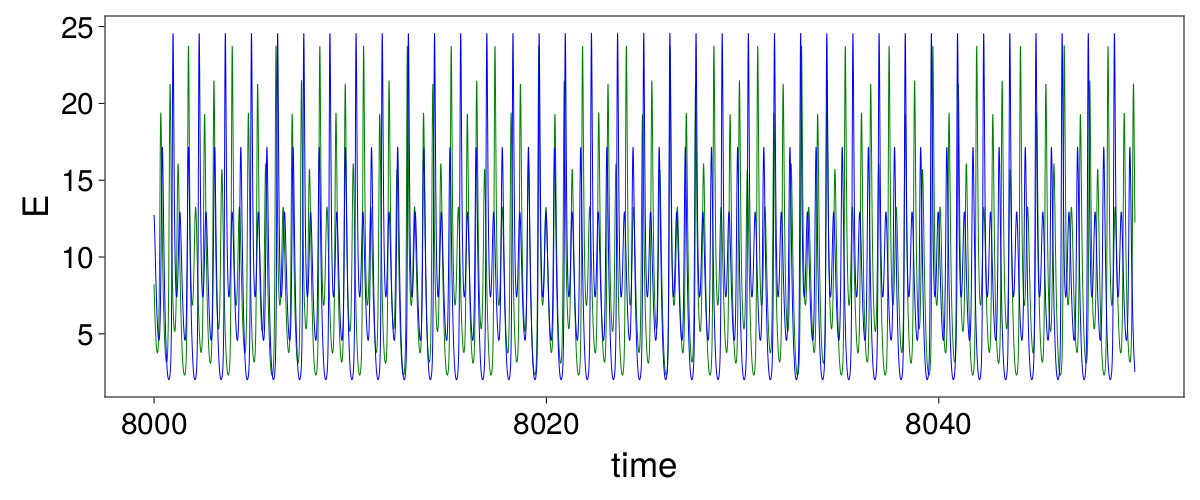

In [1053]:
lb_size = 35; tck_size = 30;
ts, tf = 8000000, 8050000
CairoMakie.activate!()
f = Figure(resolution = (1200, 500))
axis = Axis(f[1, 1], xlabel = "time", ylabel = "E",
            xlabelsize = lb_size, ylabelsize = lb_size,
            xticklabelsize = tck_size, yticklabelsize = tck_size,
            xgridvisible = false, ygridvisible = false)
lines!(axis, trange[ts:tf], tr[ts:tf, 1], linewidth = 1.0, color = :green)
lines!(axis, trange[ts:tf], tr1[ts:tf, 1], linewidth = 1.0, color = :blue)
f

In [1055]:
ts, tf = 1, 20000001
idx, idy, idz = 2, 1, 3
xl, yl, zl = labels3d(idx,idy, idz)
GLMakie.activate!()
f = Figure(resolution = (900, 900))
ax = Axis3(f[1, 1], xlabel = xl, ylabel = yl, zlabel = zl,
            xlabelsize = 35, ylabelsize = 35, zlabelsize = 35,
            xgridvisible = false, ygridvisible = false, zgridvisible = false)

lines!(tr[ts:tf, idx], tr[ts:tf, idy], tr[ts:tf, idz], linewidth = 1.0, color = :green)
lines!(tr1[ts:tf, idx], tr1[ts:tf, idy], tr1[ts:tf, idz], linewidth = 0.5, color = :blue)

scatter!(fp[1][idx], fp[1][idy], fp[1][idz], markersize = 10, color = :red)
display(f)

GLMakie.Screen(...)